[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Saving youtoxic_english_1000.csv to youtoxic_english_1000 (1).csv
Sample of dataset:


,CommentId,VideoId,Text,IsToxic,IsAbusive,IsThreat,IsProvocative,IsObscene,IsHatespeech,IsRacist,IsNationalist,IsSexist,IsHomophobic,IsReligiousHate,IsRadicalism
0,Ugg2KwwX0V8-aXgCoAEC,04kJtp6pVXI,If only people would just take a step back and...,False,False,False,False,False,False,False,False,False,False,False,False
1,Ugg2s5AzSPioEXgCoAEC,04kJtp6pVXI,Law enforcement is not trained to shoot to app...,True,True,False,False,False,False,False,False,False,False,False,False
2,Ugg3dWTOxryFfHgCoAEC,04kJtp6pVXI,\nDont you reckon them 'black lives matter' ba...,True,True,False,False,True,False,False,False,False,False,False,False
3,Ugg7Gd006w1MPngCoAEC,04kJtp6pVXI,There are a very large number of people who do...,False,False,False,False,False,False,False,False,False,False,False,False
4,Ugg8FfTbbNF8IngCoAEC,04kJtp6pVXI,"The Arab dude is absolutely right, he should h...",False,False,False,False,False,False,False,False,False,False,False,False



Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.83      0.69        93
           1       0.77      0.51      0.62       107

    accuracy                           0.66       200
   macro avg       0.69      0.67      0.66       200
weighted avg       0.69      0.66      0.65       200

Accuracy: 0.66
F1 Score: 0.6179775280898876


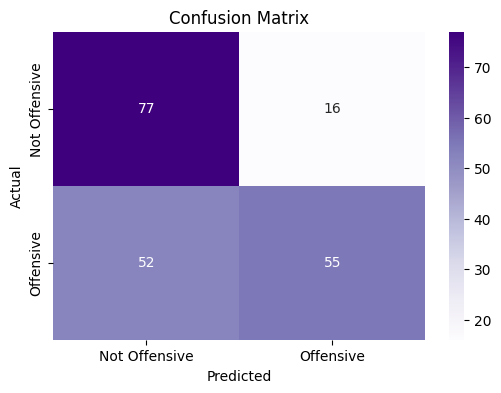


Test Predictions:
'You are an amazing person!' → Not Offensive
'You're such an idiot.' → Offensive
'I totally agree with this.' → Not Offensive
'Throw these people out of the country!' → Not Offensive


In [ ]:
# Install required packages (if running in a new environment)
# !pip install pandas numpy scikit-learn nltk matplotlib seaborn

import pandas as pd
import numpy as np
import re
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
import io

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
# Download stopwords
nltk.download('stopwords')
stop_words = set(nltk.corpus.stopwords.words('english'))

# Upload file if using Google Colab
from google.colab import files
uploaded = files.upload()

# Read uploaded CSV
for filename in uploaded.keys():
    df = pd.read_csv(io.BytesIO(uploaded[filename]))

# Display the first few rows
print("Sample of dataset:")
display(df.head())

# Create a single 'offensive' binary label
df['offensive'] = df[[
    'IsToxic', 'IsAbusive', 'IsThreat', 'IsProvocative',
    'IsObscene', 'IsHatespeech', 'IsRacist', 'IsNationalist',
    'IsSexist', 'IsHomophobic', 'IsReligiousHate', 'IsRadicalism'
]].astype(int).max(axis=1)

# Function to clean comment text
def clean_text(text):
    text = re.sub(r"[^a-zA-Z\s]", "", str(text))  # Remove non-letters
    text = text.lower()  # Convert to lowercase
    text = " ".join([word for word in text.split() if word not in stop_words])  # Remove stopwords
    return text

# Apply cleaning
df['cleaned_text'] = df['Text'].apply(clean_text)

# Split dataset
X = df['cleaned_text']
y = df['offensive']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# TF-IDF vectorization
tfidf = TfidfVectorizer(max_features=10000)
X_train_vec = tfidf.fit_transform(X_train)
X_test_vec = tfidf.transform(X_test)

# Logistic Regression model
model = LogisticRegression()
model.fit(X_train_vec, y_train)

# Predict
y_pred = model.predict(X_test_vec)

# Evaluation metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Purples',
            xticklabels=["Not Offensive", "Offensive"],
            yticklabels=["Not Offensive", "Offensive"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Function to predict new comments
def predict_comment(comment):
    cleaned = clean_text(comment)
    vec = tfidf.transform([cleaned])
    prediction = model.predict(vec)[0]
    return "Offensive" if prediction == 1 else "Not Offensive"

# Test examples
test_comments = [
    "You are an amazing person!",
    "You're such an idiot.",
    "I totally agree with this.",
    "Throw these people out of the country!"
]

print("\nTest Predictions:")
for comment in test_comments:
    print(f"'{comment}' → {predict_comment(comment)}")
